# Contents
1. Importing Visualization Libraries and Data
2. Data Preparation
3. Exploring Relationships
 - Correlations
 - Scatterplots
 - Pair Plots
 - Categorical Plots

# Import libraries

In [18]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

# Import Datasets

In [19]:
# Import dataset meat_consumption
path= r'C:\Users\TemporaryAdmin\Desktop\yoana_learning\Data Analytics\Immension\tasks\my_tasks\part_6'
meat_consumption = pd.read_csv(os.path.join(path, '02_data', 'prepared_data', 'meat_consumption_clean.csv'), index_col = False)

In [20]:
# Check dataset
meat_consumption.head()

,Unnamed: 0,location,subject,measure,year,value
0,0,AUS,BEEF,KG_CAP,1990,0.000
1,1,AUS,BEEF,KG_CAP,1991,27.942
2,2,AUS,BEEF,KG_CAP,1992,26.405
3,3,AUS,BEEF,KG_CAP,1993,26.370
4,4,AUS,BEEF,KG_CAP,1994,25.662


In [21]:
# Checking the data types
meat_consumption.dtypes

Unnamed: 0      int64
location       object
subject        object
measure        object
year            int64
value         float64
dtype: object

I will not check the correlations in this dataset since there are only a few data points and only the value column is available for mathematical operations.

In [22]:
# Import dataset polution
path= r'C:\Users\TemporaryAdmin\Desktop\yoana_learning\Data Analytics\Immension\tasks\my_tasks\part_6'
polution = pd.read_csv(os.path.join(path, '02_data', 'prepared_data', 'agricultural_methane_emissions_years_final_new.csv'), index_col = False)

In [23]:
# Check dataset
polution.head()

,Unnamed: 0,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Post-demographic dividend,Pre-demographic dividend,Small states,South Asia,South Asia (IDA & IBRD),Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Sub-Saharan Africa (IDA & IBRD countries),Upper middle income,World
0,1971,7819.39,948.33,2267.04,8003.67,13.55,71391.92,1017.12,71299.39,4790.85,...,643214.54,203167.89,16282.50,462081.02,462081.02,251448.90,251446.39,251448.90,1163422.42,2840961.47
1,1972,6672.29,930.32,2302.15,8901.30,13.47,74545.78,1047.96,78476.61,4760.50,...,654075.80,206064.10,16770.15,459594.90,459594.90,256212.48,256209.65,256212.48,1182836.11,2871562.42
2,1973,6960.20,960.89,2260.93,9776.05,13.23,77497.37,1067.61,71135.55,4810.32,...,654901.52,217738.87,17474.05,466486.88,466486.88,270082.52,270079.60,270082.52,1194238.39,2911944.73
3,1974,7378.03,985.79,2352.50,8063.48,12.83,77495.49,1099.75,75657.35,4945.58,...,674127.91,188037.33,17748.55,468547.08,468547.08,238223.69,238220.58,238223.69,1208394.15,2915398.22
4,1975,7836.13,1001.59,2512.39,10215.46,12.78,79162.96,1129.59,81516.08,4934.70,...,683966.76,210797.27,18043.21,477161.86,477161.86,261745.93,261742.64,261745.93,1229920.65,2979621.95


In [24]:
# Checking the data types
polution.dtypes

Unnamed: 0                                      int64
Afghanistan                                   float64
Albania                                       float64
Algeria                                       float64
Angola                                        float64
                                               ...   
Sub-Saharan Africa                            float64
Sub-Saharan Africa (excluding high income)    float64
Sub-Saharan Africa (IDA & IBRD countries)     float64
Upper middle income                           float64
World                                         float64
Length: 224, dtype: object

In [25]:
# Check for missing values
polution.isnull().sum()

Unnamed: 0                                    0
Afghanistan                                   0
Albania                                       0
Algeria                                       0
Angola                                        0
                                             ..
Sub-Saharan Africa                            0
Sub-Saharan Africa (excluding high income)    0
Sub-Saharan Africa (IDA & IBRD countries)     0
Upper middle income                           0
World                                         0
Length: 224, dtype: int64

In [27]:
# Find duplicates
polution_dups = polution[polution.duplicated()]

In [28]:
polution_dups.shape

(0, 224)

No missing values and no duplicates.

In [31]:
# Checking for Mixed-Type Data
for col in polution.columns.tolist():
      weird = (polution[[col]].applymap(type) != polution[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (polution[weird]) > 0:
        print (col)
        
# No mixed-type columns either!

# Correlation matrix 

In [32]:
# Create a correlation matrix using pandas
polution.corr()

,Unnamed: 0,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Post-demographic dividend,Pre-demographic dividend,Small states,South Asia,South Asia (IDA & IBRD),Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Sub-Saharan Africa (IDA & IBRD countries),Upper middle income,World
Unnamed: 0,1.000000,0.680264,0.694646,0.978828,0.859960,0.335241,0.530429,-0.722784,0.409002,-0.079805,...,-0.629587,0.957427,0.339465,0.991300,0.991300,0.959160,0.959162,0.959160,-0.673550,0.967005
Afghanistan,0.680264,1.000000,0.191759,0.705707,0.646188,-0.275082,0.306568,-0.464592,0.161628,-0.524447,...,-0.751127,0.819963,0.313640,0.710953,0.710953,0.820208,0.820206,0.820208,-0.471070,0.737857
Albania,0.694646,0.191759,1.000000,0.615560,0.709399,0.736424,0.546409,-0.888827,0.657011,0.470084,...,-0.028644,0.544353,0.355415,0.704853,0.704853,0.537989,0.537997,0.537989,-0.792658,0.561738
Algeria,0.978828,0.705707,0.615560,1.000000,0.848658,0.241532,0.458707,-0.654227,0.361466,-0.082041,...,-0.629797,0.966171,0.314638,0.972617,0.972617,0.968481,0.968482,0.968481,-0.624436,0.976630
Angola,0.859960,0.646188,0.709399,0.848658,1.000000,0.365657,0.660176,-0.782423,0.477616,0.085960,...,-0.438323,0.880953,0.421687,0.878931,0.878931,0.877254,0.877258,0.877254,-0.702422,0.856461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sub-Saharan Africa,0.959160,0.820208,0.537989,0.968481,0.877254,0.125219,0.500902,-0.646613,0.316178,-0.235932,...,-0.726389,0.999277,0.326254,0.962476,0.962476,1.000000,1.000000,1.000000,-0.618353,0.976934
Sub-Saharan Africa (excluding high income),0.959162,0.820206,0.537997,0.968482,0.877258,0.125226,0.500907,-0.646622,0.316186,-0.235923,...,-0.726383,0.999277,0.326257,0.962478,0.962478,1.000000,1.000000,1.000000,-0.618361,0.976934
Sub-Saharan Africa (IDA & IBRD countries),0.959160,0.820208,0.537989,0.968481,0.877254,0.125219,0.500902,-0.646613,0.316178,-0.235932,...,-0.726389,0.999277,0.326254,0.962476,0.962476,1.000000,1.000000,1.000000,-0.618353,0.976934
Upper middle income,-0.673550,-0.471070,-0.792658,-0.624436,-0.702422,-0.406671,-0.441450,0.940632,-0.661028,-0.218428,...,0.216023,-0.622852,-0.253049,-0.720240,-0.720240,-0.618353,-0.618361,-0.618353,1.000000,-0.539172


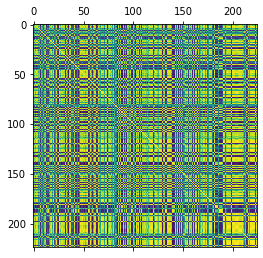

In [33]:
# Create a correlation heatmap using matplotlib
plt.matshow(polution.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

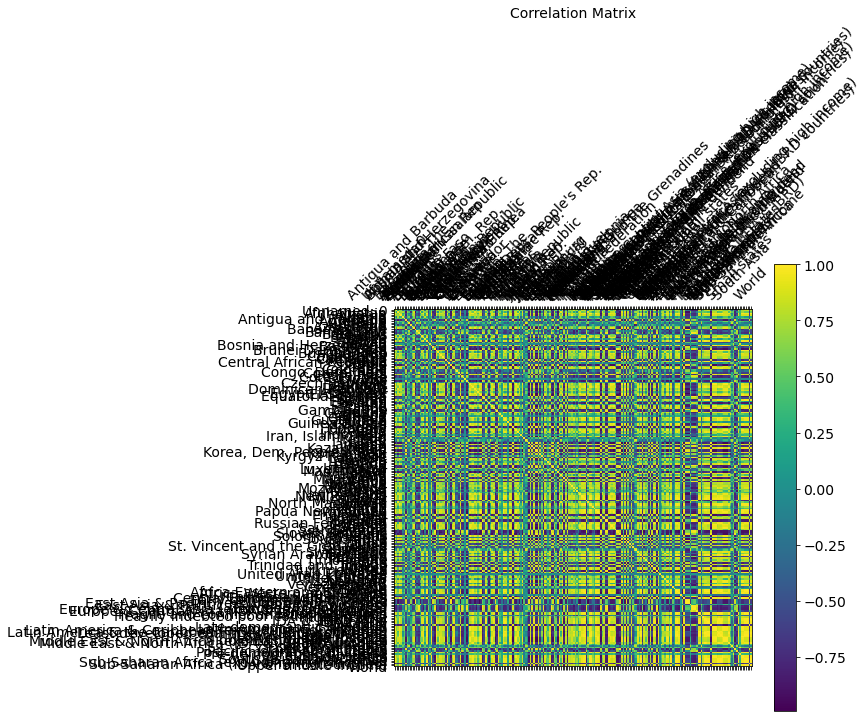

In [34]:
# Add labels, a legend, and change the size of the heatmap
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(polution.corr(), fignum=f.number) # type of plot
plt.xticks(range(polution.shape[1]), polution.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(polution.shape[1]), polution.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

## I will need to create subdatasets because I have too many data points and the correlation matrix is not readable. 

In [36]:
# Getting a list of all the column names
print(list(polution.columns))

['Unnamed: 0', 'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'I

In [237]:
# Creating a subset by regions and economic development
polution_subset= polution[['Africa Eastern and Southern',
'Africa Western and Central',
'Arab World',
'Central Europe and the Baltics',
'East Asia & Pacific',
'Euro area',
'Europe & Central Asia',
'European Union',
'Latin America & Caribbean',
'Middle East & North Africa',
'North America',
'South Asia',
'Sub-Saharan Africa',
'Fragile and conflict affected situations',
'Heavily indebted poor countries (HIPC)',
'High income',
'Low income',
'Least developed countries: UN classification',
'Middle income'
]]

In [238]:
# Create a correlation matrix using pandas
polution_subset.corr()

,Africa Eastern and Southern,Africa Western and Central,Arab World,Central Europe and the Baltics,East Asia & Pacific,Euro area,Europe & Central Asia,European Union,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa,Fragile and conflict affected situations,Heavily indebted poor countries (HIPC),High income,Low income,Least developed countries: UN classification,Middle income
Africa Eastern and Southern,1.000000,0.969931,0.962079,-0.885784,-0.684495,0.026672,-0.800139,-0.631980,0.930486,0.887469,0.529192,0.963362,0.994747,0.986722,0.982178,-0.343073,0.986416,0.969811,0.939730
Africa Western and Central,0.969931,1.000000,0.950823,-0.881023,-0.602530,-0.080627,-0.823704,-0.703630,0.887657,0.836759,0.459252,0.944318,0.989749,0.992911,0.991607,-0.439749,0.994150,0.984352,0.938795
Arab World,0.962079,0.950823,1.000000,-0.942580,-0.744466,0.082783,-0.845035,-0.635347,0.965923,0.946221,0.586984,0.977086,0.964458,0.970503,0.939315,-0.291692,0.955425,0.921518,0.896772
Central Europe and the Baltics,-0.885784,-0.881023,-0.942580,1.000000,0.688725,0.006417,0.928092,0.732970,-0.892098,-0.923392,-0.688024,-0.917264,-0.890331,-0.902480,-0.857869,0.245073,-0.887054,-0.851203,-0.754598
East Asia & Pacific,-0.684495,-0.602530,-0.744466,0.688725,1.000000,-0.681670,0.394163,0.043333,-0.864627,-0.882149,-0.731599,-0.799827,-0.655083,-0.631734,-0.574819,-0.209338,-0.609603,-0.513783,-0.602048
Euro area,0.026672,-0.080627,0.082783,0.006417,-0.681670,1.000000,0.345072,0.683863,0.284169,0.312325,0.426122,0.176234,-0.018258,-0.061334,-0.109247,0.713354,-0.080796,-0.188828,0.002945
Europe & Central Asia,-0.800139,-0.823704,-0.845035,0.928092,0.394163,0.345072,1.000000,0.907702,-0.720108,-0.748487,-0.514446,-0.774026,-0.815966,-0.844992,-0.815332,0.440795,-0.834600,-0.837837,-0.664625
European Union,-0.631980,-0.703630,-0.635347,0.732970,0.043333,0.683863,0.907702,1.000000,-0.463499,-0.464661,-0.195538,-0.555354,-0.666788,-0.705064,-0.705229,0.679051,-0.706605,-0.753958,-0.560567
Latin America & Caribbean,0.930486,0.887657,0.965923,-0.892098,-0.864627,0.284169,-0.720108,-0.463499,1.000000,0.974530,0.646212,0.977583,0.919353,0.914491,0.875468,-0.145200,0.896014,0.842598,0.885058
Middle East & North Africa,0.887469,0.836759,0.946221,-0.923392,-0.882149,0.312325,-0.748487,-0.464661,0.974530,1.000000,0.722395,0.957202,0.872703,0.869120,0.814788,-0.058456,0.846705,0.782715,0.795675


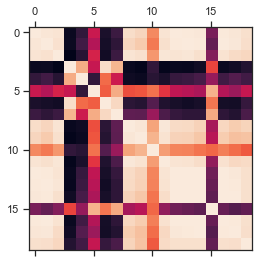

In [239]:
# Create a correlation heatmap using matplotlib
plt.matshow(polution_subset.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

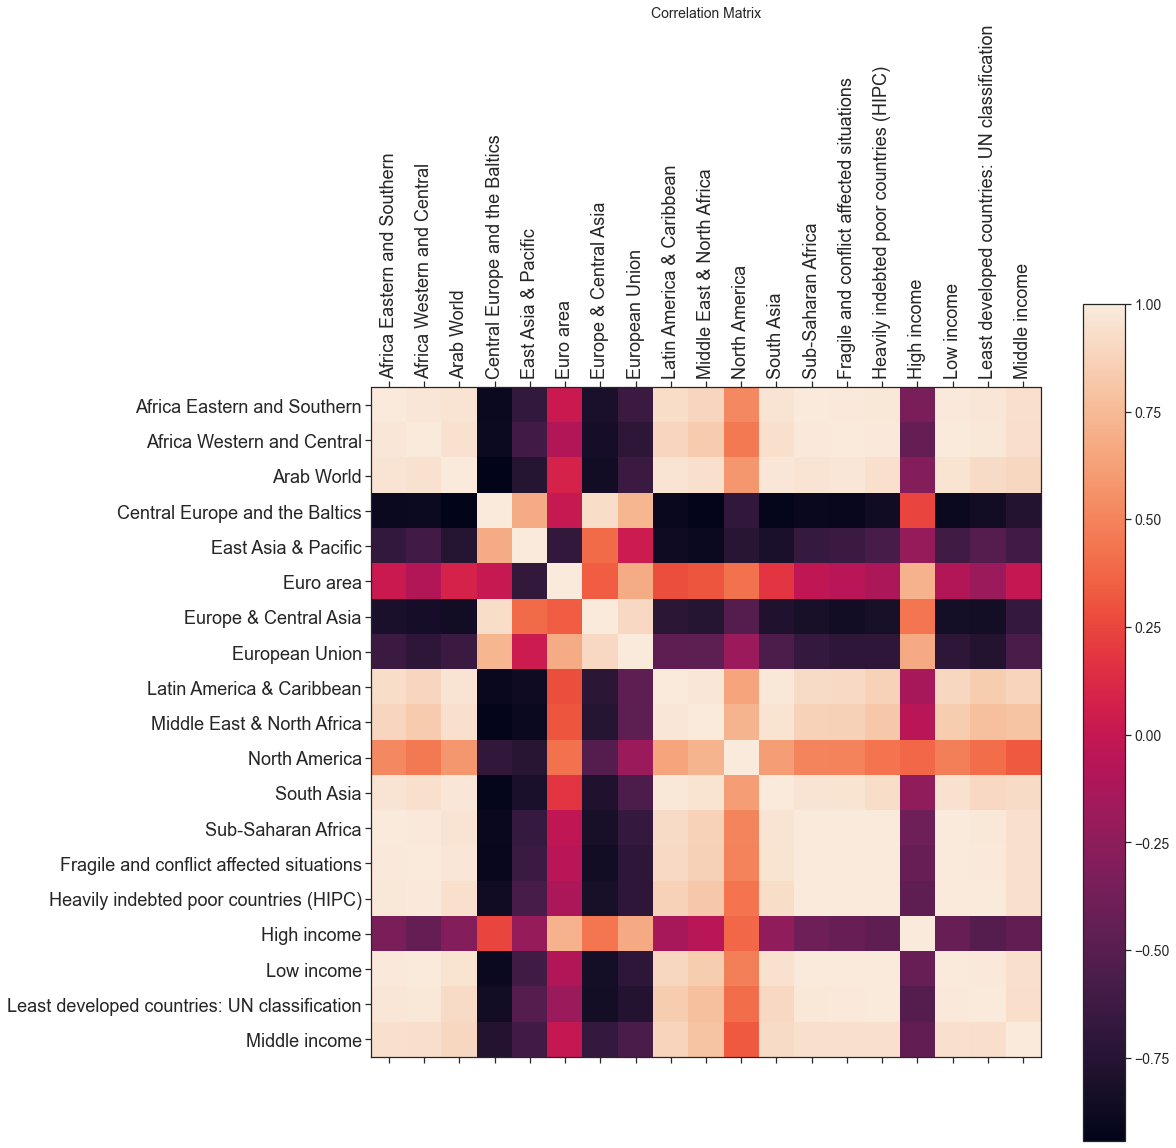

In [240]:
# Add labels, a legend, and change the size of the heatmap
f_1 = plt.figure(figsize=(15, 15)) # figure size 
plt.matshow(polution_subset.corr(), fignum=f.number) # type of plot
plt.xticks(range(polution_subset.shape[1]), polution_subset.columns, fontsize=18, rotation=90) # x axis labels
plt.yticks(range(polution_subset.shape[1]), polution_subset.columns, fontsize=18) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

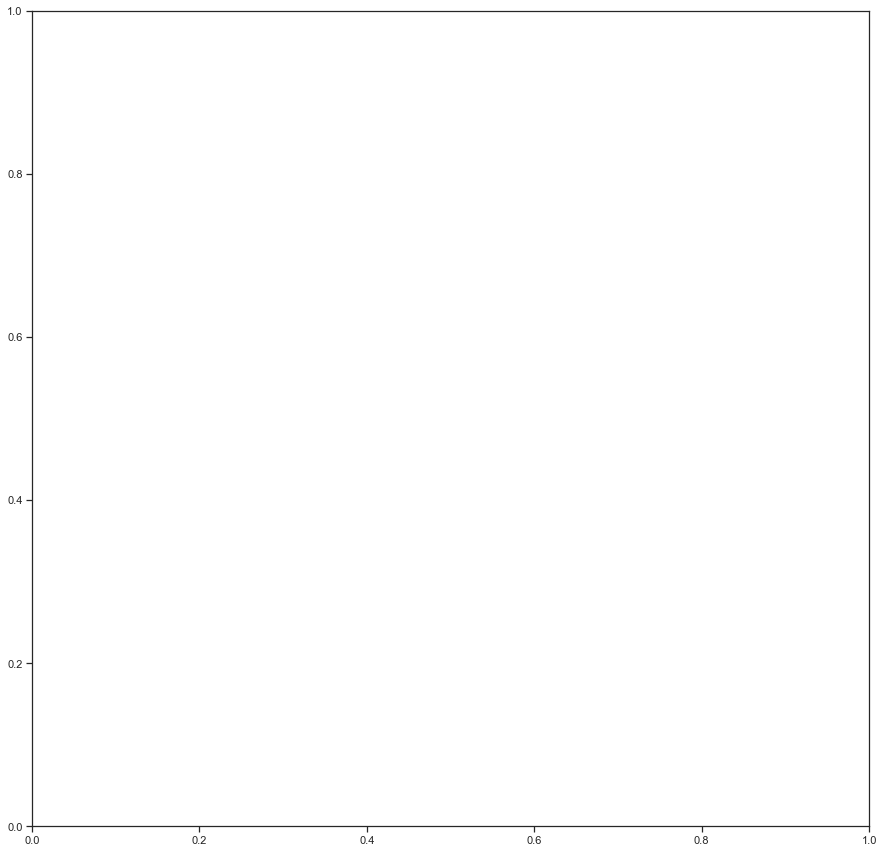

In [241]:
# Create a subplot with matplotlib. What it does is create an empty output, but this is okay—it's just to show the subplots.
f,ax = plt.subplots(figsize=(15,15))

In [242]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(polution_subset.corr(), annot = True, ax = ax) 

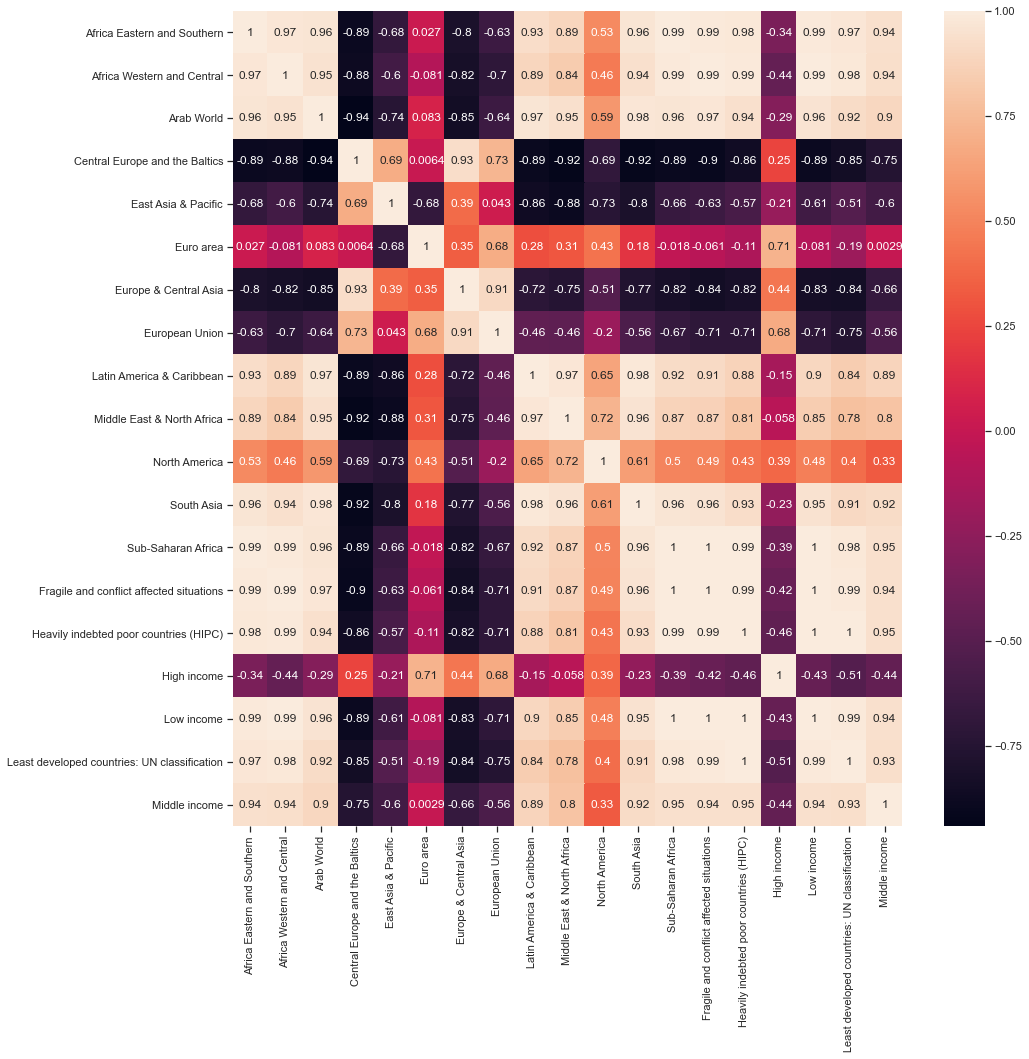

In [243]:
corr.figure

Correlations:
0: no relationship
0.1–0.3: weak relationship
0.3–0.5: moderate relationship
0.5–1.0: strong relationship

I would like to look into the different regions at this stage and economic factors/ datapoints such as Fragile and conflict affected countries, High/ Low/ Middle income, Least developed countries. 
From the correlations we can see here, for example:
- with Africa Eastern and Southern (with Fragile and conflict affected countries): A coefficient of 0.99 indicates a strong positive correlation
- with European union (with Fragile and conflict affected countries): A coefficient of -0.71 indicates a strong negative correlation

I will try to build a hypothesis that would prove that the higher the income in a country is, the more polution there will be. This might be a direct result of the ability of people to purchase more meat hense the higher demand, higher supply. Afterwards, I will look into the actual numbers that we have on country level regarding meat consumption that are in the dataset meat_consumption and will compare. To sum thing sup, I will look into the availabilites of vegan restaurants in these regions in order to try to clarify whether a shift from more expensive meat products would be possible towards a shift of more expensive bio and vegan products. 

# Scatterplots

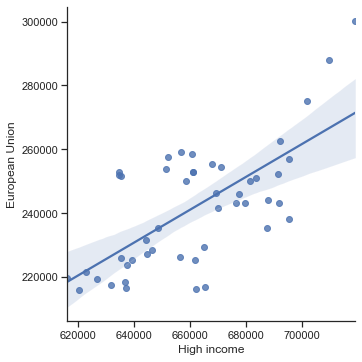

In [244]:
# Scatterplot
sns.lmplot(x = 'High income', y = 'European Union', data = polution_subset)

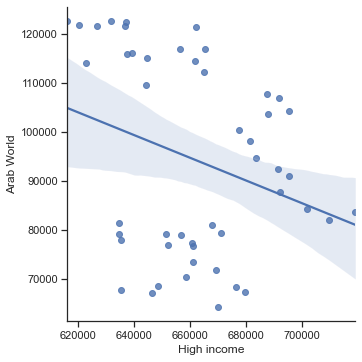

In [245]:
# Scatterplot
sns.lmplot(x = 'High income', y = 'Arab World', data = polution_subset)

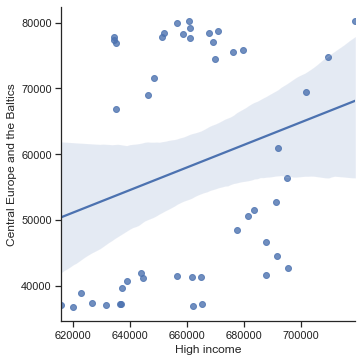

In [246]:
# Scatterplot
sns.lmplot(x = 'High income', y = 'Central Europe and the Baltics', data = polution_subset)

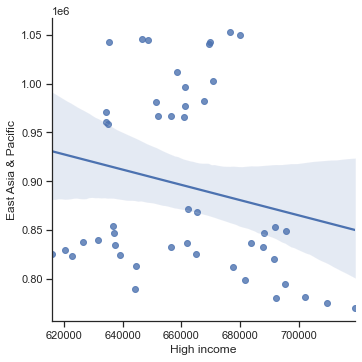

In [247]:
# Scatterplot
sns.lmplot(x = 'High income', y = 'East Asia & Pacific', data = polution_subset)

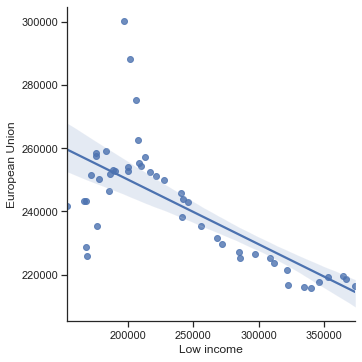

In [248]:
# Scatterplot
sns.lmplot(x = 'Low income', y = 'European Union', data = polution_subset)

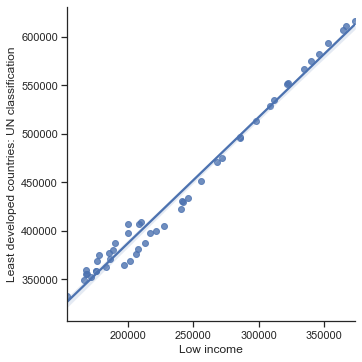

In [249]:
# Scatterplot
sns.lmplot(x = 'Low income', y = 'Least developed countries: UN classification', data = polution_subset)

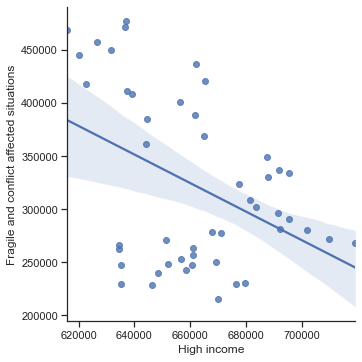

In [251]:
# Scatterplot
sns.lmplot(x = 'High income', y = 'Fragile and conflict affected situations', data = polution_subset)

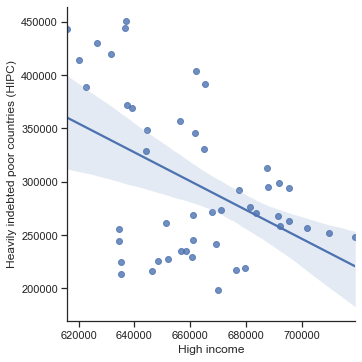

In [252]:
# Scatterplot
sns.lmplot(x = 'High income', y = 'Heavily indebted poor countries (HIPC)', data = polution_subset)

It seems that the more rich the region (higher income) is, the more poluted it is. 

# Pair Plots

In [253]:
# Keep only the variables you want to use in the pair plot
polution_subset_2 = polution[['World',
'Fragile and conflict affected situations',
'Heavily indebted poor countries (HIPC)',
'High income',
'Least developed countries: UN classification',
]]

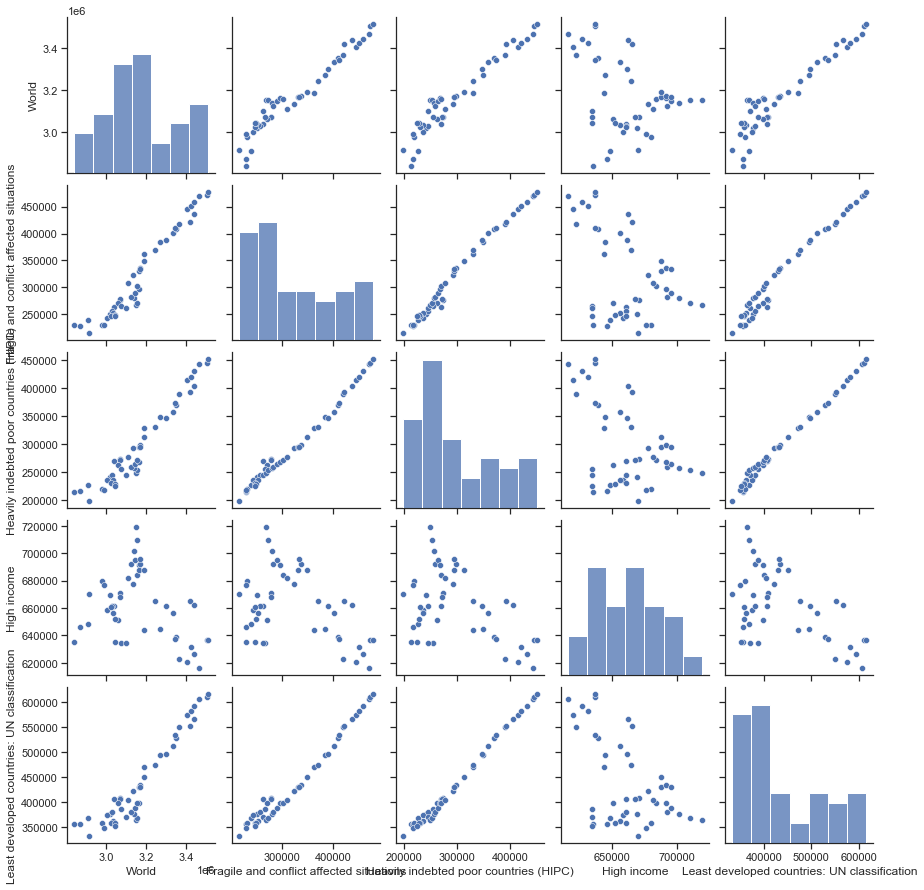

In [254]:
# Create a pair plot 
g = sns.pairplot(polution_subset_2)

I think this type of visualisations do not fully bring any added value for my analysis based on the type of data I have. I think once I would merge my meat consumption dataset together with the polution dataset I will be having a better overview by comparing meat consumption with polution based on areas and also income ranges. 

# Categorical Plots:

<AxesSubplot:xlabel='World', ylabel='Density'>

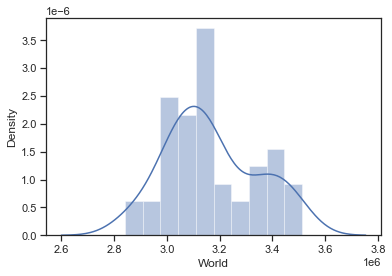

In [255]:
# Histogram
sns.distplot(polution_subset_2['World'], bins = 10)

Looking at the reslt the most common polution rate is around 3.1 and the majority of the contries are between 3 and 3.5. 

NULL HYPOTHESIS A: Economically more developed countries (countries with higher incomes and which are not part of the developing world) have lower agricultural methane emissions. 
NULL HYPOTHESIS B: Economically more developed countries (countries with higher incomes and which are not part of the developing world) have lower meat consumption. 

Alternative Hypothesis A: Economically more developed countries (countries with higher incomes and which are not part of the developing world) have higher agricultural methane emissions.
Alternative Hypothesis B: Economically more developed countries (countries with higher incomes and which are not part of the developing world) have higher meat consumption.